In [2]:
import numpy as np

In [3]:
# Calculate Gini Index
def gini_index(y):
    classes, counts = np.unique(y, return_counts=True)
    prob = counts / len(y)
    return 1 - np.sum(prob**2)

In [4]:
# Calculate Information Gain
def information_gain(y, left_y, right_y):
    entropy_before = gini_index(y)
    left_weight = len(left_y) / len(y)
    right_weight = len(right_y) / len(y)
    entropy_after = left_weight * gini_index(left_y) + right_weight * gini_index(right_y)
    return entropy_before - entropy_after


In [5]:
# Find the best split based on Information Gain
def best_split(X, y):
    best_ig = 0
    best_split_point = None
    best_left_indices = None
    best_right_indices = None
    
    for feature_index in range(X.shape[1]):
        feature_values = np.unique(X[:, feature_index])
        for value in feature_values:
            left_mask = X[:, feature_index] <= value
            right_mask = ~left_mask
            
            left_y = y[left_mask]
            right_y = y[right_mask]
            
            if len(left_y) == 0 or len(right_y) == 0:
                continue
            
            ig = information_gain(y, left_y, right_y)
            if ig > best_ig:
                best_ig = ig
                best_split_point = (feature_index, value)
                best_left_indices = left_mask
                best_right_indices = right_mask
                
    return best_split_point, best_left_indices, best_right_indices

In [6]:
# Build the decision tree
def build_tree(X, y, depth=0, max_depth=5):
    if len(np.unique(y)) == 1 or depth == max_depth:
        return np.bincount(y).argmax()
    
    best_split_point, left_mask, right_mask = best_split(X, y)
    
    if best_split_point is None:
        return np.bincount(y).argmax()
    
    feature_index, value = best_split_point
    left_tree = build_tree(X[left_mask], y[left_mask], depth + 1, max_depth)
    right_tree = build_tree(X[right_mask], y[right_mask], depth + 1, max_depth)
    
    return (feature_index, value, left_tree, right_tree)

In [13]:
def predict(tree, X):
    if isinstance(tree, (int, np.integer)):  # Check if the tree is a leaf node (class label)
        return tree
    
    feature_index, value, left_tree, right_tree = tree
    if X[feature_index] <= value:
        return predict(left_tree, X)
    else:
        return predict(right_tree, X)


In [14]:
# Testing the decision tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [15]:
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

In [16]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train decision tree
tree = build_tree(X_train, y_train, max_depth=3)

In [18]:
# Predict on test set
y_pred = np.array([predict(tree, x) for x in X_test])

In [19]:
# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 1.00


In [20]:
# Print some calculated values
print("Sample Predictions:")
for i in range(5):
    print(f"Actual: {y_test[i]}, Predicted: {y_pred[i]}")

Sample Predictions:
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

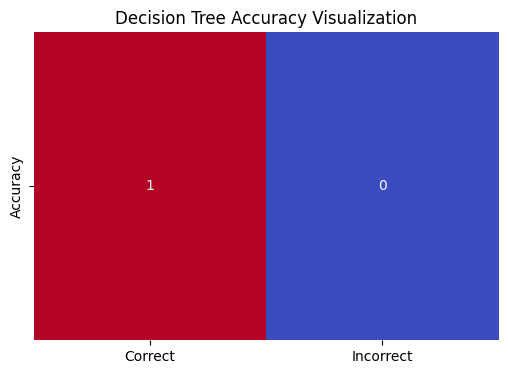

In [22]:
# Plot accuracy comparison
plt.figure(figsize=(6, 4))
sns.heatmap([[accuracy, 1 - accuracy]], annot=True, cmap="coolwarm", xticklabels=["Correct", "Incorrect"], yticklabels=["Accuracy"], cbar=False)
plt.title("Decision Tree Accuracy Visualization")
plt.show()


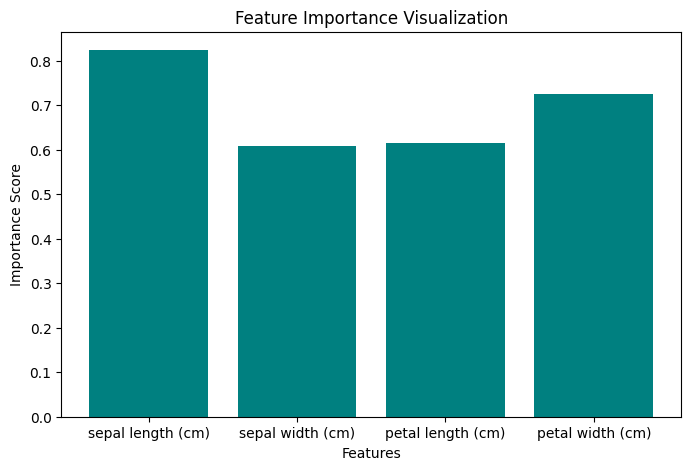

In [23]:
# Plot feature importance (dummy values for visualization)
feature_importance = np.random.rand(X.shape[1])
plt.figure(figsize=(8, 5))
plt.bar(iris.feature_names, feature_importance, color='teal')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance Visualization")
plt.show()
